# Packages and Functions

In [1]:
import os
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import json

import lib
# lib.algo_template.algo(data)
# getattr(getattr(lib, "algo_template"), "algo")(data)

# Configuration

In [4]:
# set default values for all plotting:
plt.rcParams['axes.titlesize']  = 14 #19
plt.rcParams['axes.labelsize']  = 14 #19
plt.rcParams['xtick.labelsize'] = 14 #19
plt.rcParams['ytick.labelsize'] = 14 #19
plt.rcParams['legend.fontsize'] = 12 #19
plt.rcParams['lines.linewidth'] = 2 #3
#plt.rcParams['lines.markersize'] = 7.0
#plt.rcParams['lines.markeredgecolor'] = 'white'

In [46]:
cfg = {}

# relative results path:
cfg['results path trunk 1'] = "../results/processed_data/"

# cfg['results path trunk 2'] = "benchmark_host/kr-pc/"
# cfg['results path trunk 2'] = "testing/kr-nb3/"
# cfg['results path trunk 2'] = "testing/loos/"

# cfg['results dir list'] = ['algo_no_flex'    , 'algo_exact', 
#                            'algo_Barot_wo_pc', 'algo_Barot_w_pc']
# cfg['results dir list'] = ['various_algos']
# cfg['results dir list'] = ['various_algos_part_2']

if 1: # no_tail_half_end:
    cfg['results path trunk 2'] = "no_tail_half_end/loos/"
    # cfg['results dir list']     = [f"various_algos_part_{i}" for i in range(1,5)]
    cfg['results dir list']     = ["various_algos_kr"]
    # cfg['results dir list']     = ["various_algos_ozem"]
    
if 0: # no_tail_zero_end:
    cfg['results path trunk 2'] = "no_tail_zero_end/loos/"
    cfg['results dir list']     = ["various_algos"]

if 0: # with_tail_zero_end:
    cfg['results path trunk 2'] = "with_tail_zero_end/loos/"
    cfg['results dir list']     = ["various_algos"]

# relative paths for outputs:
cfg['figures path'] = "../results/figures/"
cfg['tables path']  = "../results/tables/"

print(cfg['results path trunk 2'])

no_tail_half_end/loos/


# Transform Results

In [61]:
if 0:
    cfg['results dir']  = f"{cfg['results dir list'][0]}/"
    cfg['results path'] = cfg['results path trunk 1'] + \
                          cfg['results path trunk 2'] + \
                          cfg['results dir']
    
    # - algo_Barot_wo_pc,             => "OA by RHS Summation"
    # - algo_Barot_w_pc,              => "OA by RHS Summation with PC"
    # - algo_Outer_Homothets,         => "OA with Battery Homothets"
    # - algo_Union_Homothets_Stage_0  => "IA with Cuboid Homothets Stage 0"
    # - algo_Union_Homothets_Stage_1, => "IA with Cuboid Homothets Stage 1"
    # - algo_Inner_Homothets,         => "IA with Battery Homothets"
    # - algo_Homothet_Projection,     => "IA by Battery Homothet Projection with LDR"
    # - algo_Zonotope,                => "IA with Zonotopes $l_\infty$"
    # - algo_Zonotope_l1,             => "IA with Zonotopes $l_1$"
    # - algo_Zonotope_l2,             => "IA with Zonotopes $l_2$"
    # - algo_Zonotope_Rel,            => "IA with Zonotopes weighted"
    # - algo_Zhen_Inner,              => "IA by Ellipsoid Projection with LDR"
    # - algo_Barot_Inner,             => "IA by Ellipsoid Projection"
    algo_name_map = {
        'no flexibility'            :"no flexibility",                      # "algo_no_flex"
        'exact'                     :"exact",                               # "algo_exact"
        'Barot wo. pc.'             :"OA by RHS Summation",                 # "algo_Barot_wo_pc"
        'Barot w. pc.'              :"OA by RHS Summation with PC",         # "algo_Barot_w_pc"
        'Homothet Stage 0'          :"IA with Cuboid Homothets Stage 0",    # "algo_Union_Homothets_Stage_0"
        'Outer Battery Homothet'    :"OA with Battery Homothets",           # "algo_Outer_Homothets"
        'Inner Battery Homothet'    :"IA with Battery Homothets",           # "algo_Inner_Homothets"
        'Homothet Projection'       :"IA by Battery Homothet Projection with LDR",  # "algo_Homothet_Projection"
        'Union of Homothets Stage 1':"IA with Cuboid Homothets Stage 1",    # "algo_Union_Homothets_Stage_1"
        'Zonotopes'                 :"IA with Zonotopes $l_\infty$",        # "algo_Zonotope"
        'Zonotopes l1'              :"IA with Zonotopes $l_1$",             # "algo_Zonotope_l1"
        'Zonotopes l2'              :"IA with Zonotopes $l_2$",             # "algo_Zonotope_l2"
        'Zonotopes rel'             :"IA with Zonotopes weighted",          # "algo_Zonotope_Rel"
        'Zhen Ellipsoid Inner'      :"IA by Ellipsoid Projection with LDR", # "algo_Zhen_Inner"
        'Barot Ellipsoid Inner'     :"IA by Ellipsoid Projection"           # "algo_Barot_Inner"
        }

    with open(cfg['results path'] + 'cfg.json') as json_file:
        cfg_new = json.load(json_file)
        
        cfg_new['results path trunk 1'] = cfg['results path trunk 1']
        cfg_new['results path trunk 2'] = cfg['results path trunk 2']
        cfg_new['results dir']          = cfg['results dir']
        cfg_new['results path']         = cfg['results path']
        
        keys = list(cfg_new['algos'].keys()).copy()
        for key_old in keys:
            cfg_new['algos'][ algo_name_map[key_old] ] = cfg_new['algos'][ key_old ]
            del cfg_new['algos'][ key_old ]
        
        cfg = cfg_new
    with open(cfg['results path'] + 'cfg_new.json', 'w') as outfile:
        json.dump(cfg, outfile, indent=2)

    with open(cfg['results path'] + 'res.pickle', 'rb') as handle:
        res_new = pickle.load(handle)
        res_new['algo'].replace(algo_name_map, inplace=True)
        # print(np.unique(res_new['algo'].values))
        res = res_new
        with open(cfg['results path'] + 'res_new.pickle', 'wb') as handle:
            pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Delete Results

In [36]:
if 0:
    cfg['results dir']  = f"{cfg['results dir list'][0]}/"
    cfg['results path'] = cfg['results path trunk 1'] + \
                          cfg['results path trunk 2'] + \
                          cfg['results dir']

    with open(cfg['results path'] + 'cfg.json') as json_file:
        cfg = json.load(json_file)
    del cfg['algos']['Zonotopes']
    with open(cfg['results path'] + 'cfg.json', 'w') as outfile:
        json.dump(cfg, outfile, indent=2)

    with open(cfg['results path'] + 'res.pickle', 'rb') as handle:
        res = pickle.load(handle)
    ind = res['algo'] == 'Zonotopes'
    res.drop(res.loc[ind,].index, inplace=True)
    with open(cfg['results path'] + 'res.pickle', 'wb') as handle:
        pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Import and Merge Results

In [6]:
res = pd.DataFrame()
cfg_list = []

for subdir in cfg['results dir list']:
    cfg['results dir'] = f"{subdir}/"
    cfg['results path'] = cfg['results path trunk 1'] + \
                          cfg['results path trunk 2'] + \
                          cfg['results dir']
    with open(cfg['results path'] + 'cfg.json') as json_file:
        cfg_algo = json.load(json_file)
        cfg_list.append(cfg_algo)
    with open(cfg['results path'] + 'res.pickle', 'rb') as handle:
        res_algo = pickle.load(handle)
    # res = res.concat(res_algo)  # deprecated method
    res = pd.concat( [res, res_algo], axis=0)

print(f"res data frame has shape: {res.shape}.")
print(f"res data frame has algos: {res['algo'].unique().tolist()}.")

res data frame has shape: (67120, 12).
res data frame has algos: ['no flexibility', 'exact', 'OA by RHS Summation', 'OA by RHS Summation with PC', 'IA with Cuboid Homothets Stage 0', 'OA with Battery Homothets', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR', 'IA with Cuboid Homothets Stage 1', 'IA with Zonotopes $l_\\infty$', 'IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$', 'IA with Zonotopes weighted', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection'].


# Compute Quality Criteria

In [7]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

In [8]:
importlib.reload(lib.tools)

# comp = {'algo':'OA by RHS Summation', 'quantity':'cost_value', 'view':'raw'}
# comp = {'algo':'OA by RHS Summation.', 'quantity':'cost_value', 'view':'qual. crit.'}
comp = {'algo':'OA by RHS Summation', 'quantity':'cost_im_en', 'view':'raw'}
# comp = {'algo':'OA by RHS Summation', 'quantity':'algo_time', 'view':'raw'}
# comp = {'algo':'IA with Cuboid Homothets Stage 0',       'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'IA with Cuboid Homothets Stage 0',       'quantity':'peak_value', 'view':'qual. crit.'}
# comp = {'algo':'IA by Ellipsoid Projection with LDR',       'quantity':'peak_value', 'view':'qual. crit.'}
# comp = {'algo':'IA with Battery Homothets', 'quantity':'cost_value', 'view':'qual. crit.'}
# comp = {'algo':'IA with Battery Homothets',    'quantity':'cost_value', 'view':'qual. crit.'}

df = lib.tools.target_df(dsp, comp, res)   # sorted by dsp['c4c']

# -------- checks:
# df['target'].describe()
# df['target'].hist();
# res.to_excel('/home/kr/scratch/res.xlsx')
df

,periods,households,day,sample,target
0,4.0,2.0,2016-01-15,0.0,0.000000
1,4.0,2.0,2016-01-15,1.0,0.000000
2,4.0,2.0,2016-01-15,2.0,0.000000
3,4.0,2.0,2016-01-15,3.0,39.331503
4,4.0,2.0,2016-01-15,4.0,17.382966
...,...,...,...,...,...
5035,24.0,50.0,2016-12-15,5.0,163.044314
5036,24.0,50.0,2016-12-15,6.0,213.688562
5037,24.0,50.0,2016-12-15,7.0,189.751528
5038,24.0,50.0,2016-12-15,8.0,177.434939


# Figures

In [11]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

## Analyse One Algorithm 

In [12]:
sel = {}

# sel['algo'] = 'no flexibility'
# sel['algo'] = 'exact'
# ---------------------------------------------
# sel['algo'] = 'OA by RHS Summation'
sel['algo'] = 'OA by RHS Summation with PC'
# sel['algo'] = 'OA with Battery Homothets'      # outer
# ---------------------------------------------
# sel['algo'] = 'IA with Cuboid Homothets Stage 0'
# sel['algo'] = 'Inner Battery Homothet'
sel['algo'] = 'IA by Battery Homothet Projection with LDR'
# sel['algo'] = 'IA with Cuboid Homothets Stage 1'
# sel['algo'] = 'IA with Zonotopes $l_\infty$'
# sel['algo'] = 'IA by Ellipsoid Projection with LDR'
# sel['algo'] = 'IA by Ellipsoid Projection'

if dsp['algo type'][sel['algo']] == 'inner':
    sel['quantities'] = {'cost_value':'qual. crit.',
                         # 'peak_value':'qual. crit.',
                         'algo_time' :'raw',
                         # 'cost_time' :'raw'
                        }
elif dsp['algo type'][sel['algo']] == 'outer':
    sel['quantities'] = {'cost_im_en':'qual. crit.',
                         # 'peak_im_en':'qual. crit.',
                         'algo_time' :'raw',
                         # 'cost_time' :'raw'
                        }
else:
    sel = {}

sel['periods list'] = cfg_list[0]['periods list']
# sel['periods list'] = [2, 10]

sel['households list'] = cfg_list[0]['households list']
# sel['households list'] = [5, 20]

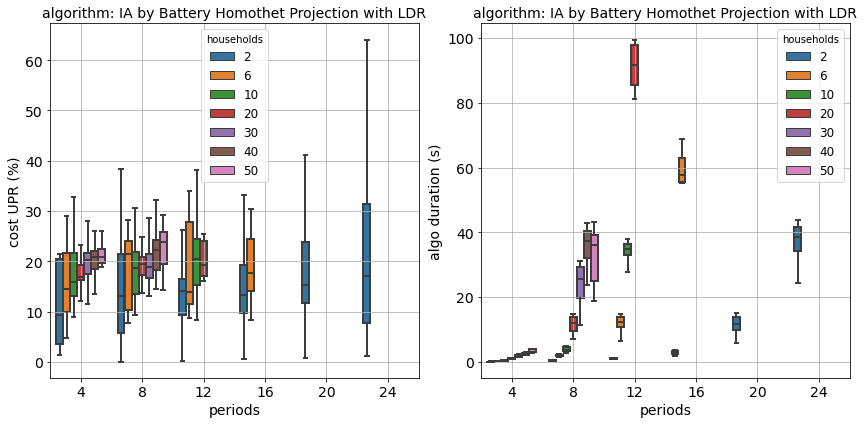

In [13]:
# figure structure:
if len(sel['quantities']) > 1:
    # nrows = int(np.ceil(len(sel['quantities'])/2))
    # fig, ax_ = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 6*nrows))
    
    ncols = len(sel['quantities'])
    fig, ax_ = plt.subplots(nrows=1, ncols=ncols, figsize=(6*ncols, 6))
    
else:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax_ = [ax]

# subplots:
counter = 0
for quantity, view in sel['quantities'].items():
    comp = {'algo':sel['algo'], 'quantity':quantity, 'view':view }
    df = lib.tools.target_df(dsp, comp, res)
    
    if df is not None:
        df.rename(columns={'target':quantity}, inplace=True)

        # slice to selection:
        ind = df['periods'].isin(sel['periods list']) & df['households'].isin(sel['households list'])
        df = df.loc[ind,]

        # cat periods and households values to integer:
        df['periods'] = df['periods'].astype(int)
        df['households'] = df['households'].astype(int)

        # boxplots:
        ax = ax_.flatten()[counter]
        sns.boxplot(ax=ax, x='periods', hue="households", y=quantity, data=df, 
                    showmeans=False, showfliers=False) # showfliers=outliers
        # sns.violinplot(ax=ax, x='periods', hue="households", y=quantity, data=df)
        ax.set_ylabel( dsp['quantity label'][quantity][view] )
        ax.grid(True)
        # ax.set_title(f"algo = {sel['algo']}, type = {dsp['algo type'][sel['algo']]}")
        ax.set_title(f"algorithm: {sel['algo']}")
        
    counter += 1
plt.tight_layout()

# save figure:
plt.savefig(cfg['figures path'] + sel['algo'] + ".pdf")

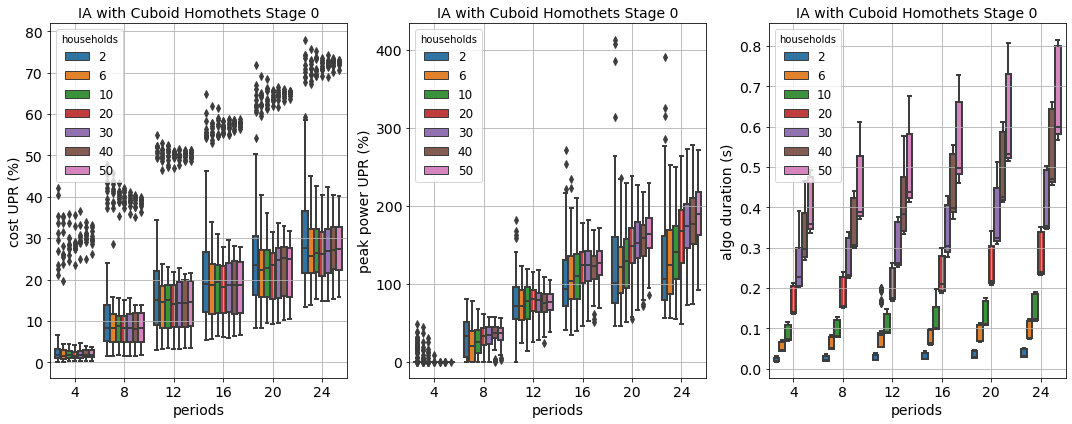

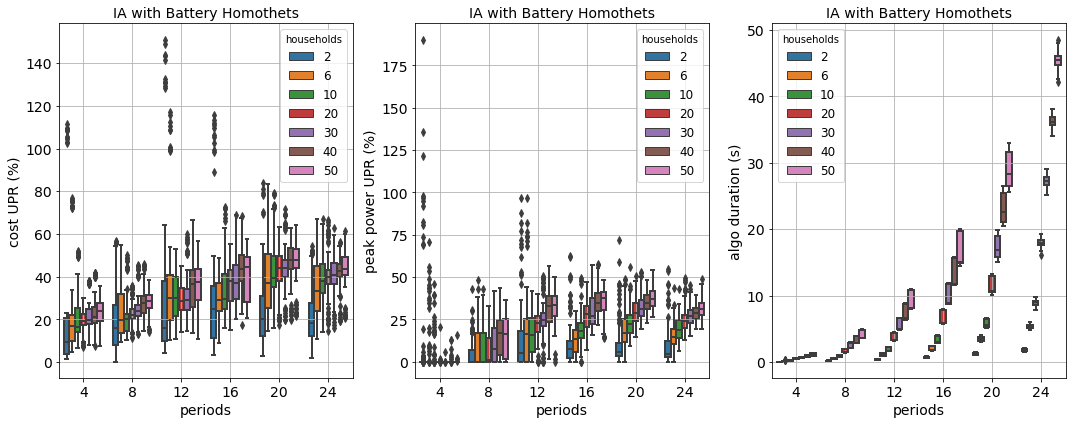

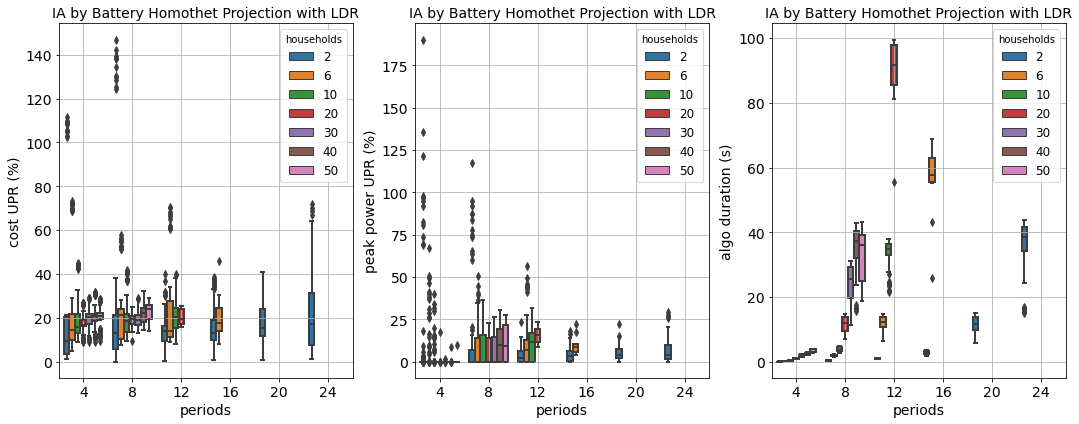

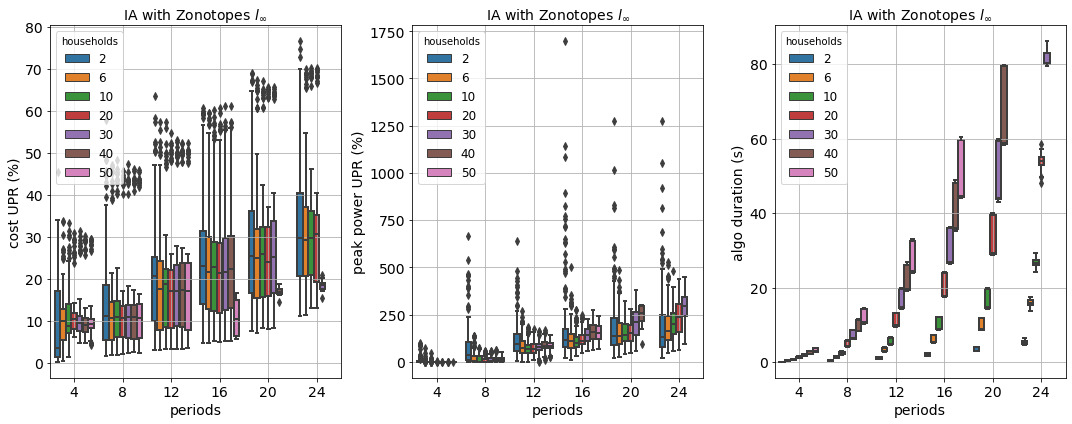

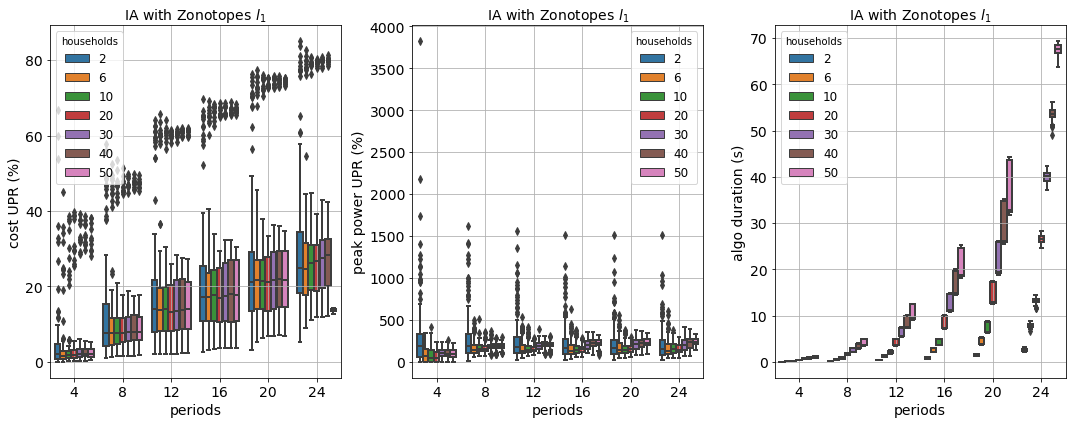

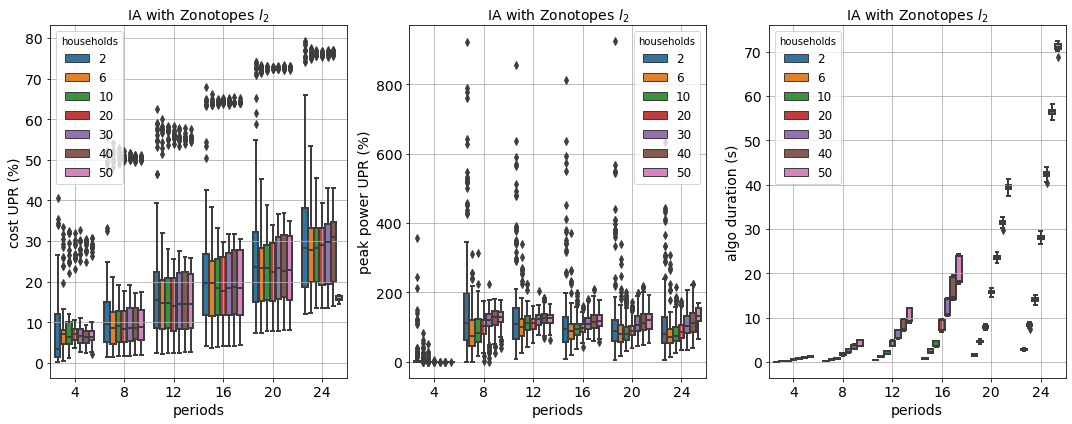

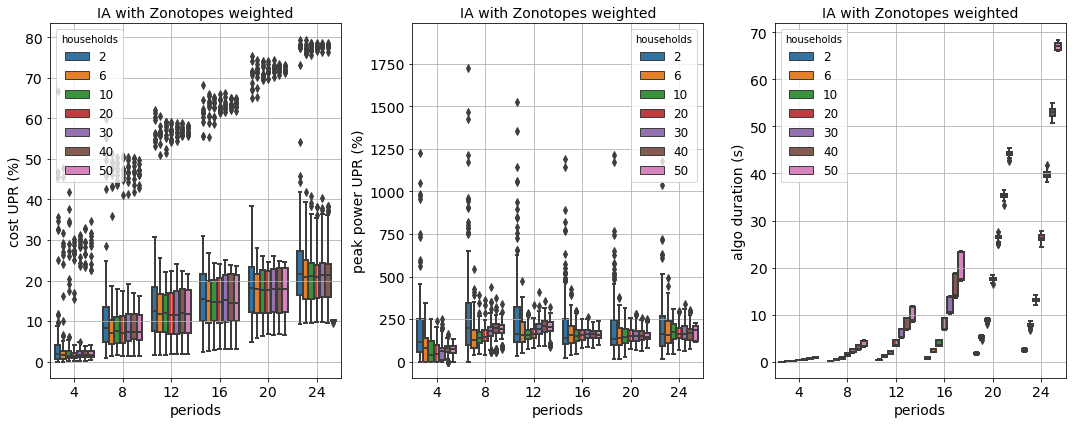

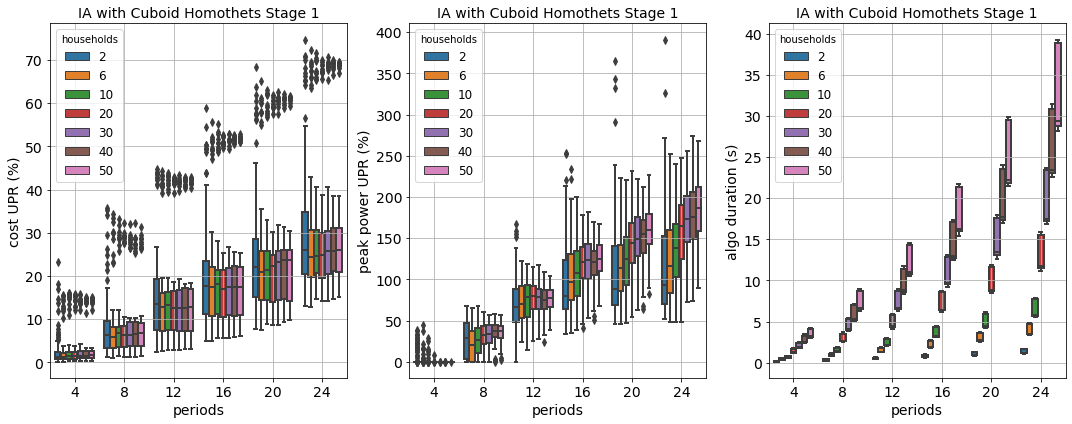

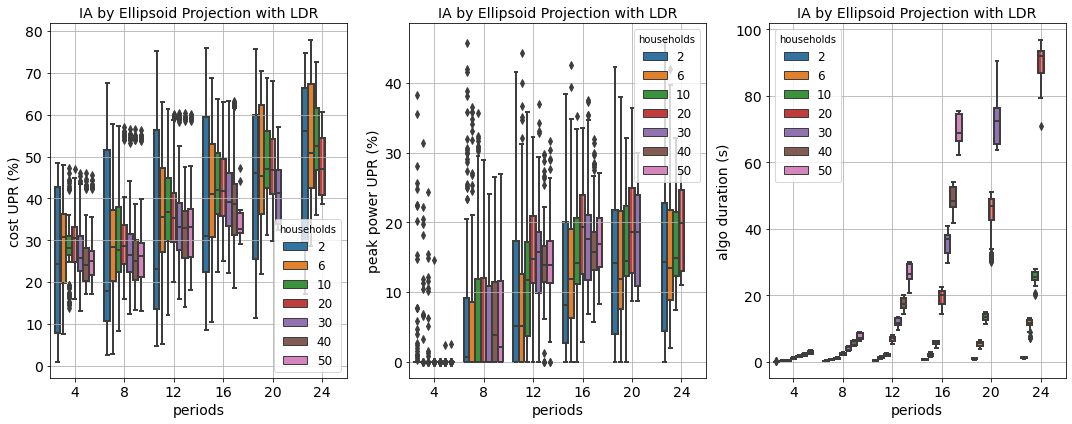

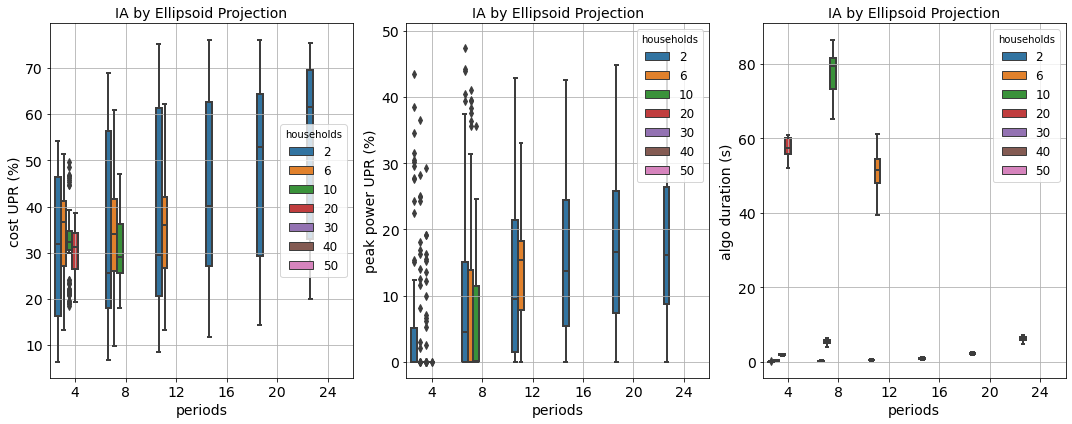

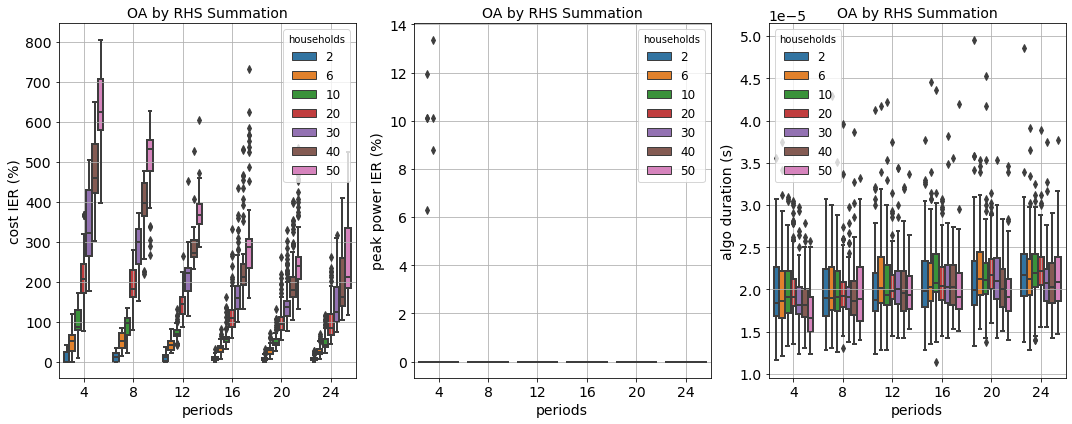

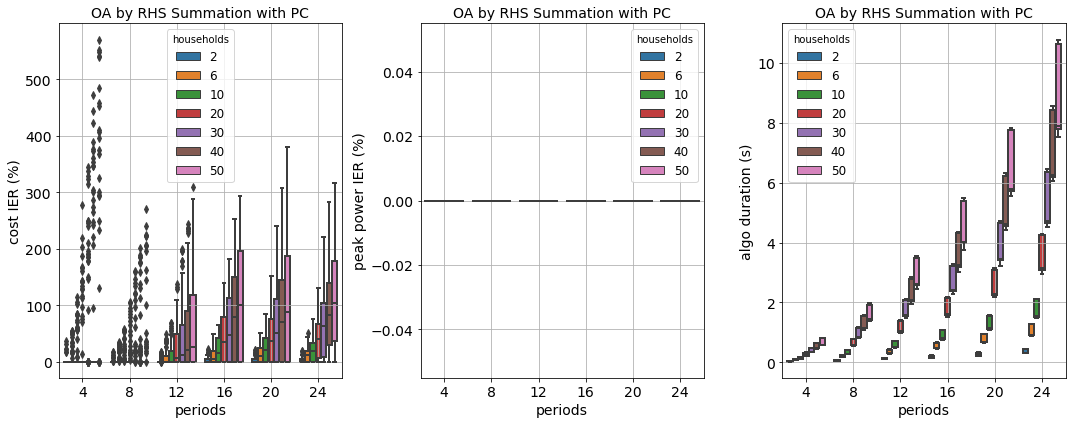

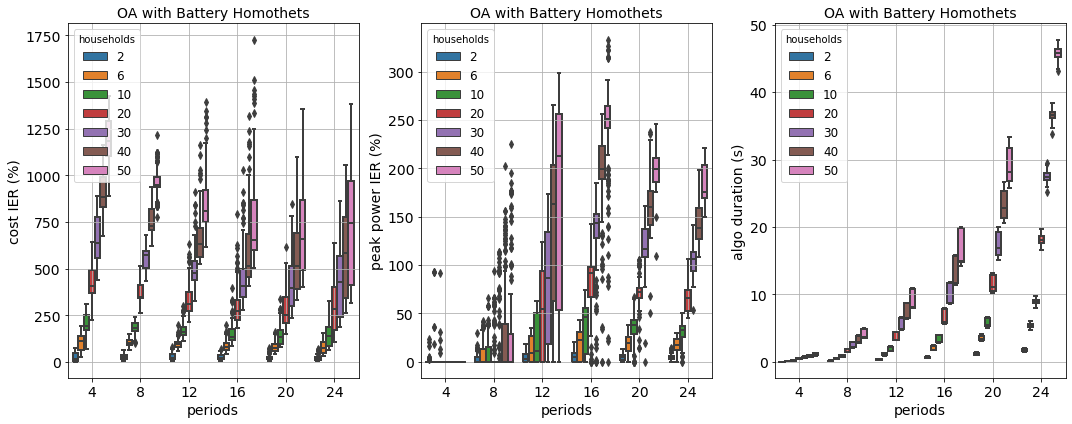

In [35]:
sel['algos'] = ['IA with Cuboid Homothets Stage 0', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR',
                'IA with Zonotopes $l_\infty$','IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$','IA with Zonotopes weighted',
                'IA with Cuboid Homothets Stage 1', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection',
                'OA by RHS Summation', 'OA by RHS Summation with PC', 'OA with Battery Homothets']

for algo in sel['algos']:
    sel['algo'] = algo
    
    if dsp['algo type'][sel['algo']] == 'inner':
        sel['quantities'] = {'cost_value':'qual. crit.',
                             'peak_value':'qual. crit.',
                             'algo_time' :'raw',
                             #'cost_time' :'raw'
                            }
    elif dsp['algo type'][sel['algo']] == 'outer':
        sel['quantities'] = {'cost_im_en':'qual. crit.',
                             'peak_im_en':'qual. crit.',
                             'algo_time' :'raw',
                             #'cost_time' :'raw'
                            }
    else:
        sel = {}

    sel['periods list'] = cfg_list[0]['periods list']
    # sel['periods list'] = [2, 10]

    sel['households list'] = cfg_list[0]['households list']
    # sel['households list'] = [5, 20]

    # figure structure:
    if len(sel['quantities']) > 1:
        # nrows = int(np.ceil(len(sel['quantities'])/2))
        fig, ax_ = plt.subplots(nrows=1, ncols=3, figsize=(15,6)) #14 #6*nrows (14, 4*nrows)
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
        ax_ = [ax]

    # subplots:
    counter = 0
    for quantity, view in sel['quantities'].items():
        comp = {'algo':sel['algo'], 'quantity':quantity, 'view':view }
        df = lib.tools.target_df(dsp, comp, res)

        if df is not None:
            df.rename(columns={'target':quantity}, inplace=True)

            # slice to selection:
            ind = df['periods'].isin(sel['periods list']) & df['households'].isin(sel['households list'])
            df = df.loc[ind,]

            # cat periods and households values to integer:
            df['periods'] = df['periods'].astype(int)
            df['households'] = df['households'].astype(int)

            # boxplots:
            ax = ax_.flatten()[counter]
            sns.boxplot(ax=ax, x='periods', hue="households", y=quantity, data=df) #, showmeans=True) showfliers=False
            # sns.violinplot(ax=ax, x='periods', hue="households", y=quantity, data=df)
            ax.set_ylabel( dsp['quantity label'][quantity][view] )
            ax.grid(True)
            ax.set_title(f"{sel['algo']}")
            #type = {dsp['algo type'][sel['algo']]}
        counter += 1
    plt.tight_layout()
    
    if sel['algo'] == 'IA with Zonotopes $l_\infty$':
        sel['algo'] = 'IA with Zonotopes infinity'
    # save figure:
    plt.savefig(cfg['figures path'] + sel['algo'] + ".pdf")

### Scratch

413.26254382542925

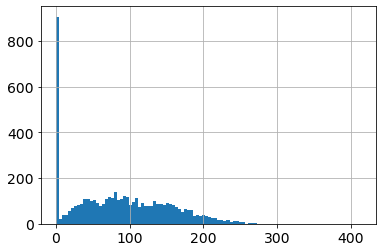

In [15]:
comp = {'algo':'OA by RHS Summation', 'quantity':'cost_im_en', 'view':'qual. crit.' }
comp = {'algo':'IA with Cuboid Homothets Stage 0', 'quantity':'peak_value', 'view':'qual. crit.' }
df = lib.tools.target_df(dsp, comp, res)

# checks:
df['target'].hist(bins=100);
df['target'].min()
df['target'].max()

## Compare Some Algorithms over Settings

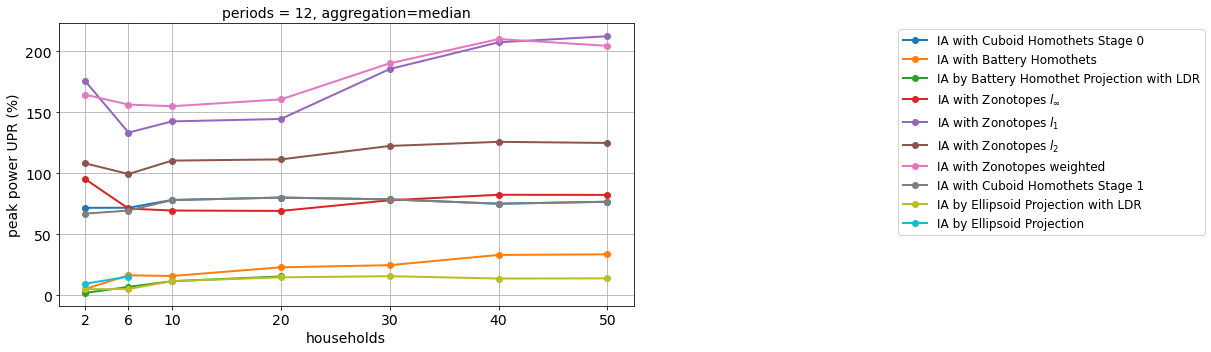

In [41]:
sel = {}

if 0: # outer
    sel['algos']    = ['OA by RHS Summation', 'OA by RHS Summation with PC', 'OA with Battery Homothets'] 
    
    sel['quantity'] = 'cost_im_en'
    sel['view']     = 'qual. crit.'
    
    # sel['quantity'] = 'algo_time'
    # sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 20
    
    sel['aggfunc']   = np.median
    
else: # inner
    # sel['algos']    = ['IA with Cuboid Homothets Stage 0', 'IA with Battery Homothets', 
    #                    'IA by Battery Homothet Projection with LDR',
    #                    # 'IA with Zonotopes $l_\infty$',
    #                    'IA with Cuboid Homothets Stage 1', 'IA by Ellipsoid Projection with LDR', 
    #                    'IA by Ellipsoid Projection']
    sel['algos']    = ['IA with Cuboid Homothets Stage 0', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR',
                       'IA with Zonotopes $l_\infty$','IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$','IA with Zonotopes weighted',
                       'IA with Cuboid Homothets Stage 1', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection']
    
    # sel['quantity'] = 'cost_value'
    # sel['view']     = 'qual. crit.'

    sel['quantity'] = 'peak_value'
    sel['view']     = 'qual. crit.'
    
    # sel['quantity'] = 'algo_time'
    # sel['view']     = 'raw'
    
    sel['serial param'] = 'periods'
    sel['fix param'] = 'households'
    sel['fix value'] = 20
    
    sel['serial param'] = 'households'
    sel['fix param'] =  'periods'
    sel['fix value'] = 12
    
    sel['aggfunc']   = np.median
    
counter = 0
comp = sel
for algo in sel['algos']:
    comp['algo'] = algo
    if counter == 0:
        df = lib.tools.target_df(dsp, comp, res)
        df
        df.rename(columns={"target": algo}, inplace=True)
    else:
        df_add = lib.tools.target_df(dsp, comp, res)
        df[algo] = df_add['target']
    counter += 1  

ind = df[sel['fix param']] == sel['fix value']
cols = [sel['serial param']] + sel['algos']
rf = df.loc[ind, cols].groupby(by=[sel['serial param']]).aggregate(sel['aggfunc'])
rf.index = rf.index.map(int)
ylabel = dsp['quantity label'][sel['quantity']][sel['view']]
title  = f"{sel['fix param']} = {sel['fix value']}, aggregation={sel['aggfunc'].__name__}"
rf.plot(figsize=(9,5), grid=True, ylabel=ylabel, title=title, 
        style='o-', xticks=rf.index)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.45, 1));


plt.savefig(cfg['figures path'] + "algo_comparison" + ".pdf")

### Scratch

-4.263256414560601e-14

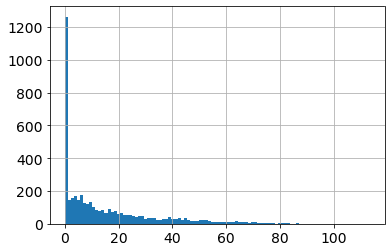

In [24]:
# comp = {'algo':'no flexibility', 'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'no flexibility', 'quantity':'cost_value', 'view':'raw' }
# comp = {'algo':'IA with Cuboid Homothets Stage 0', 'quantity':'peak_value', 'view':'raw' }
comp = {'algo':'IA with Zonotopes $l_\infty$', 'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'IA with Zonotopes $l_\infty$', 'quantity':'cost_value', 'view':'raw' }
df1 = lib.tools.target_df(dsp, comp, res)

comp = {'algo':'exact',     'quantity':'peak_value', 'view':'raw' }
# comp = {'algo':'exact',     'quantity':'cost_value', 'view':'raw' }
df2 = lib.tools.target_df(dsp, comp, res)

(df1['target'] - df2['target']).hist(bins=100);

(df1['target'] - df2['target']).max()
(df1['target'] - df2['target']).min()

## Compare All Algorithms for Fixed Setting

In [25]:
# reload local functions in lib directory:
importlib.reload(lib)
importlib.reload(lib.tools)

dsp = lib.tools.dsp_default()

,cost UPR (%),algo time (seconds)
,,
IA with Zonotopes weighted,10.11,67.05
IA with Zonotopes $l_1$,13.62,67.74
IA with Zonotopes $l_2$,15.84,71.13
IA with Cuboid Homothets Stage 1,26.06,29.36
IA with Cuboid Homothets Stage 0,27.41,0.60
IA with Battery Homothets,43.32,45.46


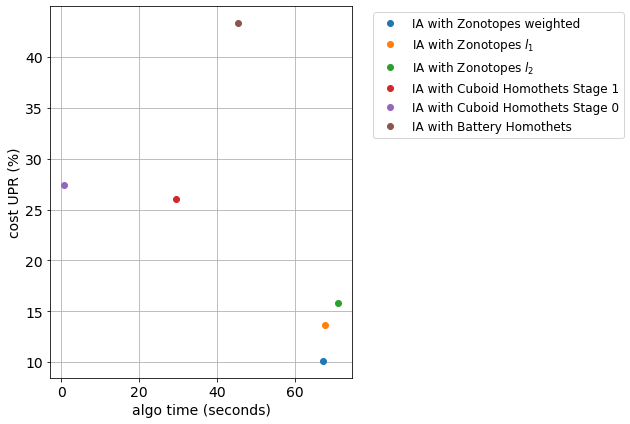

In [43]:
# setting: fix N-M-setting and choose algo type:
stg = {}

if 1: # inner:
    stg = {'periods'   : 24, 
           'households': 50,
           'algo_type' : 'inner',
           'quantity'  : 'cost_value'  # qual crit are used
           # 'quantity'  : 'peak_value'
          }
else: # outer:
    stg = {'periods'   : 24, 
           'households': 50,
           'algo_type' : 'outer',
           'quantity'  : 'cost_im_en'
           # 'quantity' : 'peak_im_en'
          }

pf = lib.tools.pareto(stg, res)
pf

In [44]:
s = pf.style.format(precision=2)
print(s.to_latex())

\begin{tabular}{lrr}
 & cost UPR (%) & algo time (seconds) \\
 &  &  \\
IA with Zonotopes weighted & 10.11 & 67.05 \\
IA with Zonotopes $l_1$ & 13.62 & 67.74 \\
IA with Zonotopes $l_2$ & 15.84 & 71.13 \\
IA with Cuboid Homothets Stage 1 & 26.06 & 29.36 \\
IA with Cuboid Homothets Stage 0 & 27.41 & 0.60 \\
IA with Battery Homothets & 43.32 & 45.46 \\
\end{tabular}



# Tables

## One Algorithm

In [29]:
sel = {}

# sel['algo'] = 'no flexibility'
# sel['algo'] = 'exact'
# ---------------------------------------------
# sel['algo'] = 'OA by RHS Summation'
# sel['algo'] = 'OA by RHS Summation with PC'
# sel['algo'] = 'Outer Battery Homothet'
# ---------------------------------------------
# sel['algo'] = 'IA with Cuboid Homothets Stage 0'
# sel['algo'] = 'IA with Battery Homothets'
# sel['algo'] = 'IA by Battery Homothet Projection with LDR'
# sel['algo'] = 'IA with Cuboid Homothets Stage 1'
# sel['algo'] = 'IA with Zonotopes $l_\infty$'
# sel['algo'] = "IA with Zonotopes $l_1$"
# sel['algo'] = "IA with Zonotopes $l_2$"
# sel['algo'] = "IA with Zonotopes weighted"
# sel['algo'] = 'IA by Ellipsoid Projection with LDR'
# sel['algo'] = 'IA by Ellipsoid Projection'
# ---------------------------------------------

sel['aggfunc']   = np.median

if 1: # outer
    sel['algo'] = 'OA by RHS Summation with PC'
    
    sel['quantity'] = 'cost_im_en'
    # sel['quantity'] = 'peak_im_en'
    
    sel['view']     = 'qual. crit.'
        
elif 1: # inner
    
    sel['algo'] = 'IA by Battery Homothet Projection with LDR'
    
    sel['quantity'] = 'cost_value'
    # sel['quantity'] = 'peak_value'
    
    sel['view']     = 'qual. crit.'
    
else:
    sel['quantity'] = 'algo_time'
    sel['view']     = 'raw'
    

df = lib.tools.target_df(dsp, sel, res)
tf = pd.pivot_table(data=df, values='target', index='households', columns='periods', 
                    aggfunc=sel['aggfunc'])
tf.index = tf.index.map(int)
tf.columns = tf.columns.map(int)
tf = tf.round(2)  # rounding!!!
tf

periods,4,8,12,16,20,24
households,,,,,,
2,0.0,0.0,0.00,0.00,0.00,1.30
6,0.0,0.0,0.00,4.17,10.75,11.20
10,0.0,0.0,0.00,14.96,21.46,18.64
20,0.0,0.0,5.81,34.77,36.06,39.78
30,0.0,0.0,11.16,48.05,50.52,62.78
40,0.0,0.0,19.93,79.21,70.50,83.01
50,0.0,0.0,26.68,99.57,88.32,103.47


In [30]:
# export table:
# print(tf.style.to_latex())
# tf.to_latex('mytable.tex')

s = tf.style.format(precision=2)
print(s.to_latex())

\begin{tabular}{lrrrrrr}
periods & 4 & 8 & 12 & 16 & 20 & 24 \\
households &  &  &  &  &  &  \\
2 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.30 \\
6 & 0.00 & 0.00 & 0.00 & 4.17 & 10.75 & 11.20 \\
10 & 0.00 & 0.00 & 0.00 & 14.96 & 21.46 & 18.64 \\
20 & 0.00 & 0.00 & 5.81 & 34.77 & 36.06 & 39.78 \\
30 & 0.00 & 0.00 & 11.16 & 48.05 & 50.52 & 62.78 \\
40 & 0.00 & 0.00 & 19.93 & 79.21 & 70.50 & 83.01 \\
50 & 0.00 & 0.00 & 26.68 & 99.57 & 88.32 & 103.47 \\
\end{tabular}



In [31]:
# s.to_latex('mytable.tex')

## Several Algorithms

In [57]:
select = 1
if select == 1:
    sel['algos']    = ['IA with Cuboid Homothets Stage 0', 'IA with Battery Homothets', 'IA by Battery Homothet Projection with LDR',
                       'IA with Zonotopes $l_\infty$','IA with Zonotopes $l_1$', 'IA with Zonotopes $l_2$','IA with Zonotopes weighted',
                       'IA with Cuboid Homothets Stage 1', 'IA by Ellipsoid Projection with LDR', 'IA by Ellipsoid Projection',]
elif select == 0:
    sel['algos']    = ['OA by RHS Summation', 'OA by RHS Summation with PC', 'OA with Battery Homothets'] 

sel['aggfunc']   = np.median

for algo in sel['algos']:
    sel['algo'] = algo
    
    if select == 0: # outer
        sel['quantity'] = 'cost_im_en'
        # sel['quantity'] = 'peak_im_en'
        sel['view']     = 'qual. crit.'

    elif select == 1: # inner
        sel['quantity'] = 'cost_value'
        # sel['quantity'] = 'peak_value'
        sel['view']     = 'qual. crit.'
        
    # sel['quantity'] = 'algo_time'
    # sel['view']     = 'raw'    

    df = lib.tools.target_df(dsp, sel, res)
    tf = pd.pivot_table(data=df, values='target', index='households', columns='periods', 
                        aggfunc=sel['aggfunc'])
    tf.index = tf.index.map(int)
    tf.columns = tf.columns.map(int)
    tf = tf.round(2)  # rounding!!!
    #tf
    s = tf.style.format(precision=2)
    html = s.to_html()
    
    if sel['algo'] == 'IA with Zonotopes $l_\infty$':
        sel['algo'] = 'IA with Zonotopes infinity'
    
    text_file = open(cfg['tables path'] +sel['algo'] + "_" +sel['quantity']+"_table.html", "w")
    text_file.write(html)
    text_file.close()